In [1]:
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
housing_data = pd.read_csv('E:\DataScience\House Price\housingpricedata.csv')
housing_data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
#Data conversion into an array.
dataset = housing_data.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [4]:
#split the dataset into independent and dependent datasets
X = dataset[:, 0:10] #Get all the rows from columns 0 to 10.
Y = dataset[:,10] #Getting all the rows from column at position 10 i.e the Above Median Price column

In [5]:
#Data scaling.
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [6]:
#Split the data into training and testing i.e 80% training and 20% testing.
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y,test_size = 0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test,test_size = 0.5)

In [7]:
print(X_train.shape, X_val.shape,X_test.shape,Y_train.shape,Y_val.shape,Y_test.shape)

(1168, 10) (146, 10) (146, 10) (1168,) (146,) (146,)


In [8]:
#Start modeling the ANN.
model = Sequential()
model.add(Dense(units=32,activation='relu',input_dim=10))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [9]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy',metrics= ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
#Model training.
hist = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))


Train on 1168 samples, validate on 146 samples
Epoch 1/100
1168/1168 [==============================] - 0s 408us/step - loss: 0.6583 - accuracy: 0.5034 - val_loss: 0.6609 - val_accuracy: 0.5616
Epoch 2/100
1168/1168 [==============================] - 0s 112us/step - loss: 0.6457 - accuracy: 0.6224 - val_loss: 0.6502 - val_accuracy: 0.6438
Epoch 3/100
1168/1168 [==============================] - 0s 110us/step - loss: 0.6352 - accuracy: 0.7380 - val_loss: 0.6416 - val_accuracy: 0.6918
Epoch 4/100
1168/1168 [==============================] - 0s 110us/step - loss: 0.6250 - accuracy: 0.7603 - val_loss: 0.6323 - val_accuracy: 0.7260
Epoch 5/100
1168/1168 [==============================] - 0s 108us/step - loss: 0.6144 - accuracy: 0.7800 - val_loss: 0.6221 - val_accuracy: 0.7603
Epoch 6/100
1168/1168 [==============================] - 0s 110us/step - loss: 0.6035 - accuracy: 0.8005 - val_loss: 0.6121 - val_accuracy: 0.7740
Epoch 7/100
1168/1168 [==============================] - 0s 110us/step

1168/1168 [==============================] - 0s 113us/step - loss: 0.2704 - accuracy: 0.8904 - val_loss: 0.3311 - val_accuracy: 0.8767
Epoch 55/100
1168/1168 [==============================] - 0s 125us/step - loss: 0.2694 - accuracy: 0.8913 - val_loss: 0.3299 - val_accuracy: 0.8904
Epoch 56/100
1168/1168 [==============================] - 0s 114us/step - loss: 0.2676 - accuracy: 0.8930 - val_loss: 0.3299 - val_accuracy: 0.8904
Epoch 57/100
1168/1168 [==============================] - 0s 110us/step - loss: 0.2654 - accuracy: 0.8938 - val_loss: 0.3302 - val_accuracy: 0.8767
Epoch 58/100
1168/1168 [==============================] - 0s 118us/step - loss: 0.2649 - accuracy: 0.8870 - val_loss: 0.3454 - val_accuracy: 0.8630
Epoch 59/100
1168/1168 [==============================] - 0s 110us/step - loss: 0.2653 - accuracy: 0.8913 - val_loss: 0.3360 - val_accuracy: 0.8699
Epoch 60/100
1168/1168 [==============================] - 0s 121us/step - loss: 0.2644 - accuracy: 0.8921 - val_loss: 0.3282 

In [11]:
#model Evaluation.
model.evaluate(X_test,Y_test)[1]

146/146 [==============================] - 0s 89us/step


0.8698630332946777

In [14]:
#Making the prediction.
prediction = model.predict(X_test)
prediction = [1 if y>= 0.869 else 0 for y in prediction]
prediction

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0]

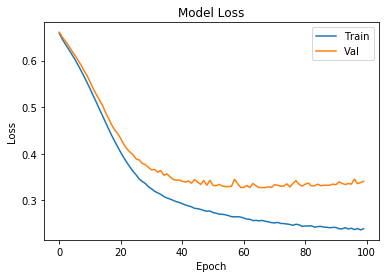

In [16]:
#Visualizing the training loss and the validation loss.
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'],loc='upper right')

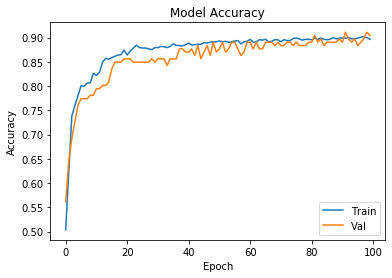

In [18]:
#Visualizing the training accuracy and the validation accuracy.
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'],loc='lower right')